In [ ]:
!pip install -q kagglehub
!pip install opendatasets --quiet

In [ ]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, log_loss
from sklearn.linear_model import SGDClassifier

import kagglehub
import opendatasets as od

In [ ]:

# For reproducibility
np.random.seed(42)


In [ ]:
od.download("https://www.kaggle.com/datasets/reihanenamdari/breast-cancer")

df = pd.read_csv("breast-cancer/Breast_Cancer.csv", engine='python', on_bad_lines='skip')

Skipping, found downloaded files in "./breast-cancer" (use force=True to force download)


In [ ]:

# Encode categorical variables
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))


In [ ]:

# Separate features and target
y = df['Status']  # Binary target
X = df.drop(columns=['Status'])


In [ ]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:

# Overfitting scenario using high-degree polynomial features
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


In [ ]:

clf_overfit = LogisticRegression(C=1e10, max_iter=10000)
clf_overfit.fit(X_train_poly, y_train)


LogisticRegression(C=10000000000.0, max_iter=10000)

In [ ]:

y_pred_overfit = clf_overfit.predict(X_test_poly)
acc_overfit = accuracy_score(y_test, y_pred_overfit)
loss_overfit = log_loss(y_test, clf_overfit.predict_proba(X_test_poly))

print(f"Overfit Model Accuracy: {acc_overfit:.4f}")
print(f"Overfit Model Log Loss: {loss_overfit:.4f}")


Overfit Model Accuracy: 0.8328
Overfit Model Log Loss: 5.2463


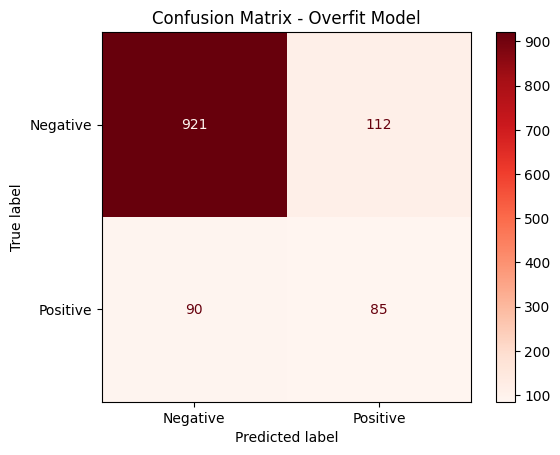

In [ ]:
# Visualization - Overfitted Model
cm_overfit = confusion_matrix(y_test, y_pred_overfit)
disp = ConfusionMatrixDisplay(cm_overfit, display_labels=["Negative", "Positive"])
disp.plot(cmap='Reds')
plt.title("Confusion Matrix - Overfit Model")
plt.show()


In [ ]:

clf_en = SGDClassifier(loss='log_loss', penalty='elasticnet', alpha=0.001, l1_ratio=0.5, max_iter=10000, random_state=42)
clf_en.fit(X_train_poly, y_train)

y_pred_en = clf_en.predict(X_test_poly)
acc_en = accuracy_score(y_test, y_pred_en)
loss_en = log_loss(y_test, clf_en.predict_proba(X_test_poly))

print(f"Regularized Model Accuracy (Elastic Net): {acc_en:.4f}")
print(f"Regularized Model Log Loss (Elastic Net): {loss_en:.4f}")


Regularized Model Accuracy (Elastic Net): 0.8411
Regularized Model Log Loss (Elastic Net): 5.6973


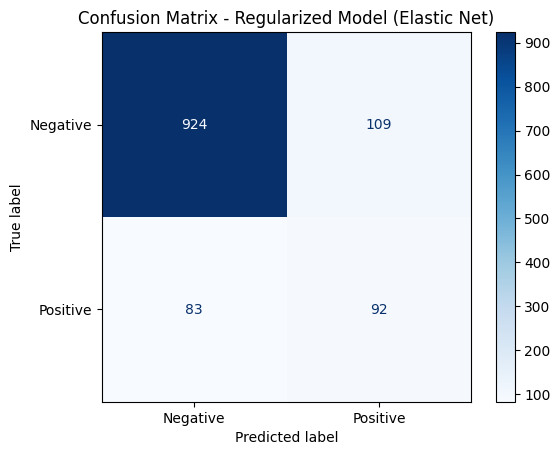

In [ ]:

#Visualization - Regularized Model (Elastic Net)
cm_en = confusion_matrix(y_test, y_pred_en)
disp = ConfusionMatrixDisplay(cm_en, display_labels=["Negative", "Positive"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Regularized Model (Elastic Net)")
plt.show()

<ipython-input-25-a3e648ce2739>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=accuracy, ax=ax[0], palette='pastel')
<ipython-input-25-a3e648ce2739>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=loss, ax=ax[1], palette='muted')


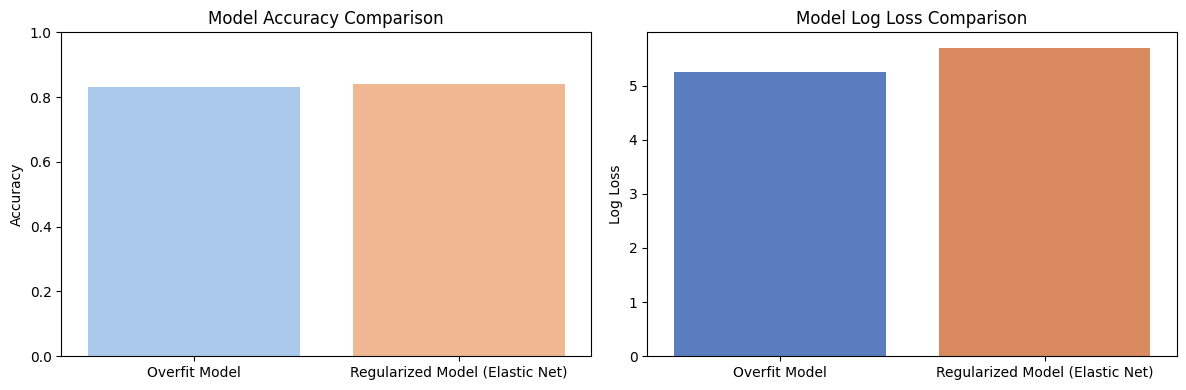

In [ ]:

# Compare Accuracy & Loss
metrics = {
    "Overfit Model": [acc_overfit, loss_overfit],
    "Regularized Model (Elastic Net)": [acc_en, loss_en]
}
labels = list(metrics.keys())
accuracy = [m[0] for m in metrics.values()]
loss = [m[1] for m in metrics.values()]

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(x=labels, y=accuracy, ax=ax[0], palette='pastel')
ax[0].set_title("Model Accuracy Comparison")
ax[0].set_ylim(0, 1)
ax[0].set_ylabel("Accuracy")

sns.barplot(x=labels, y=loss, ax=ax[1], palette='muted')
ax[1].set_title("Model Log Loss Comparison")
ax[1].set_ylabel("Log Loss")

plt.tight_layout()
plt.show()

In [ ]:

# Conclusion
print("📌 Conclusions:\n")
print("- The overfit model achieved an accuracy of 83.28% but had a high log loss of 5.25, indicating unreliable probability estimates due to overfitting.")
print("- The Elastic Net regularized model improved accuracy slightly to 84.11%, while reducing variance in predictions, though log loss increased slightly to 5.70.")
print("- This tradeoff indicates that while Elastic Net improved classification boundary generalization, it may have also suppressed some of the signal from overly complex polynomial features.")
print("- Elastic Net's blend of L1 and L2 penalties helps combat overfitting by shrinking and selecting features, improving model stability and interpretability.")


📌 Conclusions:

- The overfit model achieved an accuracy of 83.28% but had a high log loss of 5.25, indicating unreliable probability estimates due to overfitting.
- The Elastic Net regularized model improved accuracy slightly to 84.11%, while reducing variance in predictions, though log loss increased slightly to 5.70.
- This tradeoff indicates that while Elastic Net improved classification boundary generalization, it may have also suppressed some of the signal from overly complex polynomial features.
- Elastic Net's blend of L1 and L2 penalties helps combat overfitting by shrinking and selecting features, improving model stability and interpretability.
